In [1]:
import pandas as pd
import numpy as np
from ofxparse import OfxParser
import matplotlib.pyplot as plt
import os
from datetime import datetime

# load in the data
df = pd.read_pickle("transactions.pkl")

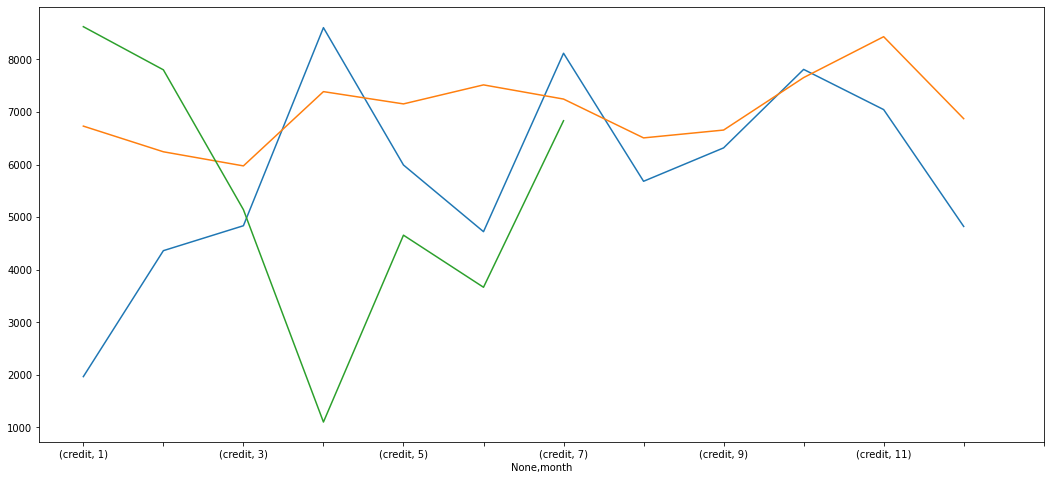

In [2]:
plt.figure(figsize=(18,8))
dff = df[~(df.credit == 0)][['date', 'year', 'month', 'credit']]

monthly_income_by_year = dff.groupby(['year', 'month']).sum().unstack()

monthly_income_by_year.loc[2018].plot()
monthly_income_by_year.loc[2019].plot()
monthly_income_by_year.loc[2020].plot()
plt.xticks([i for i in range(13)])
plt.show()